In [5]:
import graphvizDrawTree as gvz

In [6]:
class ArbreBinaire:
    def __init__(self, cle: int, gauche = None, droite = None) -> None:
        self.cle = cle
        self.gauche = gauche
        self.droite = droite


class ABR:
    def __init__(self) -> None:
        self.racine = None

    def est_vide(self) -> bool:
        return self.racine is None

    #RECHERCHE
    def recherche(self, cle : int) -> bool:
        '''ABR * int -> bool'''
        '''Recherche une clé dans l'arbre binaire'''
        return self._recherche(self.racine, cle)
    
    def _recherche(self, noeud : 'ArbreBinaire', cle : int) -> bool:
        '''ABR * ArbreBinaire * int -> bool'''
        '''Recherche une clé dans l'arbre binaire'''
        if noeud is None:
            return False
        elif cle < noeud.cle:
            return self._recherche(noeud.gauche, cle)
        elif cle > noeud.cle:
            return self._recherche(noeud.droite, cle)
        else:
            return True

    ## AJOUT
    
    def ajout_liste(self, cles : list) -> 'ABR':
        '''ABR * list -> ArbreBinaire'''
        '''Ajoute une liste de clés à l'arbre binaire'''
        abr = ABR()
        for cle in cles:
            abr = abr.ajout(cle)
        return abr
    
    def ajout(self, cle : int) -> 'ABR' :
        '''ABR * int -> ArbreBinaire'''
        '''Ajoute une clé à l'arbre binaire'''
        abr = ABR()
        abr.racine = self._ajout(self.racine, cle)
        return abr

    def _ajout(self, noeud : ArbreBinaire, cle : int) -> ArbreBinaire :
        '''ABR * ArbreBinaire * int -> ArbreBinaire'''
        '''Ajoute une clé à l'arbre binaire'''
        if noeud is None: # si l'arbre est vide, on crée un nouveau noeud 
            return ArbreBinaire(cle)
        elif cle == noeud.cle: # si la clé est déjà dans l'arbre, on ne fait rien 
            return ArbreBinaire(noeud.cle, noeud.gauche, noeud.droite, noeud.hauteur)
        elif cle < noeud.cle: # si la clé est inférieure à la clé du noeud, on ajoute la clé dans le sous-arbre gauche
            nouveauGauche = self._ajout(noeud.gauche, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, nouveauGauche, noeud.droite)
        else: # si la clé est supérieure à la clé du noeud, on ajoute la clé dans le sous-arbre droit
            nouveauDroite = self._ajout(noeud.droite, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, nouveauDroite)

        return nouveauNoeud
    
    #SUPPRESSION
    def supprime(self, cle : int) -> 'ABR':
        '''ABR * int -> ArbreBinaire'''
        '''Supprime une clé de l'arbre binaire'''
        abr = ABR()
        abr.racine = self._supprime(self.racine, cle)
        return abr
    
    def _supprime(self, noeud : 'ArbreBinaire', cle : int) -> 'ArbreBinaire':
        '''ABR * ArbreBinaire * int -> ArbreBinaire'''
        '''Supprime une clé de l'arbre binaire'''
        if noeud is None: # si l'arbre est vide, on ne fait rien
            return noeud
        elif cle < noeud.cle: # si la clé est inférieure à la clé du noeud, on supprime la clé dans le sous-arbre gauche
            nouveauNoeud = ArbreBinaire(noeud.cle, self._supprime(noeud.gauche, cle), noeud.droite)
        elif cle > noeud.cle: # si la clé est supérieure à la clé du noeud, on supprime la clé dans le sous-arbre droit
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, self._supprime(noeud.droite, cle))
        else: # sinon la clé est égale à la clé du noeud, on supprime le noeud et on le remplace par le sous-arbre gauche ou droit
            # si un des sous-arbres est vide, on remplace le noeud par l'autre sous-arbre
            if noeud.gauche is None: 
                return noeud.droite
            elif noeud.droite is None: 
                return noeud.gauche

            # sinon, on remplace le noeud par le noeud minimal du sous-arbre droit
            min_noeud = self._min_noeud(noeud.droite)
            nouveauNoeud = ArbreBinaire(min_noeud.cle, noeud.gauche, self._supprime(noeud.droite, min_noeud.cle))

        return nouveauNoeud
    
    def _min_noeud(self, noeud: ArbreBinaire) -> ArbreBinaire:
        '''ABR * ArbreBinaire -> ArbreBinaire'''
        '''Retourne le noeud minimal = le plus à gauche de l'arbre binaire'''
        if noeud is None or noeud.gauche is None:
            return noeud
        return self._min_noeud(noeud.gauche)
    
    def visualiser_arbre(self) -> None:
        '''ABR -> None'''
        '''Affiche l'arbre binaire'''
        return gvz.draw_tree(self.racine)

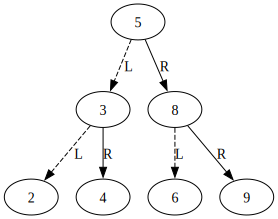

In [7]:
abr = ABR()
abr = abr.ajout_liste([5, 3, 8, 2, 4, 6, 9])

dot = abr.visualiser_arbre()
dot 

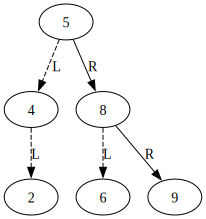

In [8]:
A = abr.supprime(3)
dot = A.visualiser_arbre()
dot

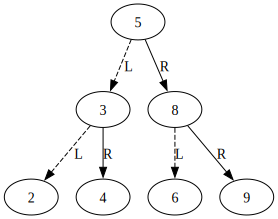

In [9]:
dot = abr.visualiser_arbre()
dot